In [1]:
# meta-data does not work yet in VScode
# https://github.com/microsoft/vscode-jupyter/issues/1121

{
    "tags": [
        "hide-cell"
    ]
}


### Install necessary libraries

try:
    import jax
except:
    # For cuda version, see https://github.com/google/jax#installation
    %pip install --upgrade "jax[cpu]" 
    import jax

try:
    import distrax
except:
    %pip install --upgrade  distrax
    import distrax

try:
    import jsl
except:
    %pip install git+https://github.com/probml/jsl
    import jsl

try:
    import rich
except:
    %pip install rich
    import rich




In [2]:
{
    "tags": [
        "hide-cell"
    ]
}


### Import standard libraries

import abc
from dataclasses import dataclass
import functools
import itertools

from typing import Any, Callable, NamedTuple, Optional, Union, Tuple

import matplotlib.pyplot as plt
import numpy as np


import jax
import jax.numpy as jnp
from jax import lax, vmap, jit, grad
from jax.scipy.special import logit
from jax.nn import softmax
from functools import partial
from jax.random import PRNGKey, split

import inspect
import inspect as py_inspect
import rich
from rich import inspect as r_inspect
from rich import print as r_print

def print_source(fname):
    r_print(py_inspect.getsource(fname))

```{math}

\newcommand\floor[1]{\lfloor#1\rfloor}

\newcommand{\real}{\mathbb{R}}

% Numbers
\newcommand{\vzero}{\boldsymbol{0}}
\newcommand{\vone}{\boldsymbol{1}}

% Greek https://www.latex-tutorial.com/symbols/greek-alphabet/
\newcommand{\valpha}{\boldsymbol{\alpha}}
\newcommand{\vbeta}{\boldsymbol{\beta}}
\newcommand{\vchi}{\boldsymbol{\chi}}
\newcommand{\vdelta}{\boldsymbol{\delta}}
\newcommand{\vDelta}{\boldsymbol{\Delta}}
\newcommand{\vepsilon}{\boldsymbol{\epsilon}}
\newcommand{\vzeta}{\boldsymbol{\zeta}}
\newcommand{\vXi}{\boldsymbol{\Xi}}
\newcommand{\vell}{\boldsymbol{\ell}}
\newcommand{\veta}{\boldsymbol{\eta}}
%\newcommand{\vEta}{\boldsymbol{\Eta}}
\newcommand{\vgamma}{\boldsymbol{\gamma}}
\newcommand{\vGamma}{\boldsymbol{\Gamma}}
\newcommand{\vmu}{\boldsymbol{\mu}}
\newcommand{\vmut}{\boldsymbol{\tilde{\mu}}}
\newcommand{\vnu}{\boldsymbol{\nu}}
\newcommand{\vkappa}{\boldsymbol{\kappa}}
\newcommand{\vlambda}{\boldsymbol{\lambda}}
\newcommand{\vLambda}{\boldsymbol{\Lambda}}
\newcommand{\vLambdaBar}{\overline{\vLambda}}
%\newcommand{\vnu}{\boldsymbol{\nu}}
\newcommand{\vomega}{\boldsymbol{\omega}}
\newcommand{\vOmega}{\boldsymbol{\Omega}}
\newcommand{\vphi}{\boldsymbol{\phi}}
\newcommand{\vvarphi}{\boldsymbol{\varphi}}
\newcommand{\vPhi}{\boldsymbol{\Phi}}
\newcommand{\vpi}{\boldsymbol{\pi}}
\newcommand{\vPi}{\boldsymbol{\Pi}}
\newcommand{\vpsi}{\boldsymbol{\psi}}
\newcommand{\vPsi}{\boldsymbol{\Psi}}
\newcommand{\vrho}{\boldsymbol{\rho}}
\newcommand{\vtheta}{\boldsymbol{\theta}}
\newcommand{\vthetat}{\boldsymbol{\tilde{\theta}}}
\newcommand{\vTheta}{\boldsymbol{\Theta}}
\newcommand{\vsigma}{\boldsymbol{\sigma}}
\newcommand{\vSigma}{\boldsymbol{\Sigma}}
\newcommand{\vSigmat}{\boldsymbol{\tilde{\Sigma}}}
\newcommand{\vsigmoid}{\vsigma}
\newcommand{\vtau}{\boldsymbol{\tau}}
\newcommand{\vxi}{\boldsymbol{\xi}}


% Lower Roman (Vectors)
\newcommand{\va}{\mathbf{a}}
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vBt}{\mathbf{\tilde{B}}}
\newcommand{\vc}{\mathbf{c}}
\newcommand{\vct}{\mathbf{\tilde{c}}}
\newcommand{\vd}{\mathbf{d}}
\newcommand{\ve}{\mathbf{e}}
\newcommand{\vf}{\mathbf{f}}
\newcommand{\vg}{\mathbf{g}}
\newcommand{\vh}{\mathbf{h}}
%\newcommand{\myvh}{\mathbf{h}}
\newcommand{\vi}{\mathbf{i}}
\newcommand{\vj}{\mathbf{j}}
\newcommand{\vk}{\mathbf{k}}
\newcommand{\vl}{\mathbf{l}}
\newcommand{\vm}{\mathbf{m}}
\newcommand{\vn}{\mathbf{n}}
\newcommand{\vo}{\mathbf{o}}
\newcommand{\vp}{\mathbf{p}}
\newcommand{\vq}{\mathbf{q}}
\newcommand{\vr}{\mathbf{r}}
\newcommand{\vs}{\mathbf{s}}
\newcommand{\vt}{\mathbf{t}}
\newcommand{\vu}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vws}{\vw_s}
\newcommand{\vwt}{\mathbf{\tilde{w}}}
\newcommand{\vWt}{\mathbf{\tilde{W}}}
\newcommand{\vwh}{\hat{\vw}}
\newcommand{\vx}{\mathbf{x}}
%\newcommand{\vx}{\mathbf{x}}
\newcommand{\vxt}{\mathbf{\tilde{x}}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vyt}{\mathbf{\tilde{y}}}
\newcommand{\vz}{\mathbf{z}}
%\newcommand{\vzt}{\mathbf{\tilde{z}}}


% Upper Roman (Matrices)
\newcommand{\vA}{\mathbf{A}}
\newcommand{\vB}{\mathbf{B}}
\newcommand{\vC}{\mathbf{C}}
\newcommand{\vD}{\mathbf{D}}
\newcommand{\vE}{\mathbf{E}}
\newcommand{\vF}{\mathbf{F}}
\newcommand{\vG}{\mathbf{G}}
\newcommand{\vH}{\mathbf{H}}
\newcommand{\vI}{\mathbf{I}}
\newcommand{\vJ}{\mathbf{J}}
\newcommand{\vK}{\mathbf{K}}
\newcommand{\vL}{\mathbf{L}}
\newcommand{\vM}{\mathbf{M}}
\newcommand{\vMt}{\mathbf{\tilde{M}}}
\newcommand{\vN}{\mathbf{N}}
\newcommand{\vO}{\mathbf{O}}
\newcommand{\vP}{\mathbf{P}}
\newcommand{\vQ}{\mathbf{Q}}
\newcommand{\vR}{\mathbf{R}}
\newcommand{\vS}{\mathbf{S}}
\newcommand{\vT}{\mathbf{T}}
\newcommand{\vU}{\mathbf{U}}
\newcommand{\vV}{\mathbf{V}}
\newcommand{\vW}{\mathbf{W}}
\newcommand{\vX}{\mathbf{X}}
%\newcommand{\vXs}{\vX_{\vs}}
\newcommand{\vXs}{\vX_{s}}
\newcommand{\vXt}{\mathbf{\tilde{X}}}
\newcommand{\vY}{\mathbf{Y}}
\newcommand{\vZ}{\mathbf{Z}}
\newcommand{\vZt}{\mathbf{\tilde{Z}}}
\newcommand{\vzt}{\mathbf{\tilde{z}}}


%%%%
\newcommand{\hidden}{\vz}
\newcommand{\hid}{\hidden}
\newcommand{\observed}{\vy}
\newcommand{\obs}{\observed}
\newcommand{\inputs}{\vu}
\newcommand{\input}{\inputs}

\newcommand{\hmmTrans}{\vA}
\newcommand{\hmmObs}{\vB}
\newcommand{\hmmInit}{\vpi}
\newcommand{\hmmhid}{\hidden}
\newcommand{\hmmobs}{\obs}

\newcommand{\ldsDyn}{\vA}
\newcommand{\ldsObs}{\vC}
\newcommand{\ldsDynIn}{\vB}
\newcommand{\ldsObsIn}{\vD}
\newcommand{\ldsDynNoise}{\vQ}
\newcommand{\ldsObsNoise}{\vR}

\newcommand{\ssmDynFn}{f}
\newcommand{\ssmObsFn}{h}


%%%
\newcommand{\gauss}{\mathcal{N}}

\newcommand{\diag}{\mathrm{diag}}
```


(sec:ssm-intro)=
# What are State Space Models?


A state space model or SSM
is a partially observed Markov model,
in which the hidden state,  $\hidden_t$,
evolves over time according to a Markov process,
possibly conditional on external inputs or controls $\input_t$,
and each hidden state generates some
observations $\obs_t$ at each time step.
(In this book, we mostly focus on discrete time systems,
although  we consider the continuous-time case in  XXX.)
We get to see the observations, but not the hidden state.
Our main goal is to infer the hidden state given the observations.
However, we can also use the model to predict future observations,
by first predicting future hidden states, and then predicting
what observations they might generate.
By using  a hidden state $\hidden_t$
to represent the past observations, $\obs_{1:t-1}$,
the  model can have ``infinite'' memory,
unlike a standard Markov model.

Formally we can define an SSM 
as the following joint distribution:
```{math}
:label: eq:SSM-ar
p(\hmmobs_{1:T},\hmmhid_{1:T}|\inputs_{1:T})
 = \left[ p(\hmmhid_1|\inputs_1) \prod_{t=2}^{T}
 p(\hmmhid_t|\hmmhid_{t-1},\inputs_t) \right]
 \left[ \prod_{t=1}^T p(\hmmobs_t|\hmmhid_t, \inputs_t, \hmmobs_{t-1}) \right]
```
where $p(\hmmhid_t|\hmmhid_{t-1},\inputs_t)$ is the
transition model,
$p(\hmmobs_t|\hmmhid_t, \inputs_t, \hmmobs_{t-1})$ is the
observation model,
and $\inputs_{t}$ is an optional input or action.
See {numref}`Figure %s <ssm-ar>` 
for an illustration of the corresponding graphical model.


```{figure} /figures/SSM-AR-inputs.png
:scale: 100%
:name: ssm-ar

Illustration of an SSM as a graphical model.
```


We often consider a simpler setting in which the
 observations are conditionally independent of each other
(rather than having Markovian dependencies) given the hidden state.
In this case the joint simplifies to 
```{math}
:label: eq:SSM-input
p(\hmmobs_{1:T},\hmmhid_{1:T}|\inputs_{1:T})
 = \left[ p(\hmmhid_1|\inputs_1) \prod_{t=2}^{T}
 p(\hmmhid_t|\hmmhid_{t-1},\inputs_t) \right]
 \left[ \prod_{t=1}^T p(\hmmobs_t|\hmmhid_t, \inputs_t) \right]
```
Sometimes there are no external inputs, so the model further
simplifies to the following unconditional generative model: 
```{math}
:label: eq:SSM-no-input
p(\hmmobs_{1:T},\hmmhid_{1:T})
 = \left[ p(\hmmhid_1) \prod_{t=2}^{T}
 p(\hmmhid_t|\hmmhid_{t-1}) \right]
 \left[ \prod_{t=1}^T p(\hmmobs_t|\hmmhid_t) \right]
```
See {numref}`Figure %s <ssm-simplified>` 
for an illustration of the corresponding graphical model.


```{figure} /figures/SSM-simplified.png
:scale: 100%
:name: ssm-simplified

Illustration of a simplified SSM.
```



(sec:hmm-intro)=
# Hidden Markov Models

In this section, we discuss the
hidden Markov model or HMM,
which is a state space model in which the hidden states
are discrete, so $\hmmhid_t \in \{1,\ldots, K\}$.
The observations may be discrete,
$\hmmobs_t \in \{1,\ldots, C\}$,
or continuous,
$\hmmobs_t \in \real^D$,
or some combination,
as we illustrate below.
More details can be found in e.g., 
{cite}`Rabiner89,Fraser08,Cappe05`.
For an interactive introduction,
see https://nipunbatra.github.io/hmm/.

(sec:casino)=
### Example: Casino HMM

To illustrate HMMs with categorical observation model,
we consider the "Ocassionally dishonest casino" model from {cite}`Durbin98`.
There are 2 hidden states, representing whether the dice being used in the casino is fair or loaded.
Each state defines a distribution over the 6 possible observations.

The transition model is denoted by
```{math}
p(z_t=j|z_{t-1}=i) = \hmmTrans_{ij}
```
Here the $i$'th row of $\vA$ corresponds to the outgoing distribution from state $i$.
This is  a row stochastic matrix,
meaning each row sums to one.
We can visualize
the non-zero entries in the transition matrix by creating a state transition diagram,
as shown in 
{numref}`Figure %s <casino-fig>`
%{ref}`casino-fig`.

```{figure} /figures/casino.png
:scale: 50%
:name: casino-fig

Illustration of the casino HMM.
```

The  observation model
$p(\obs_t|\hidden_t=j)$ has the form
```{math}
p(\obs_t=k|\hidden_t=j) = \hmmObs_{jk} 
```
This is represented by the histograms associated with each
state in {ref}`casino-fig`.

Finally,
the initial state distribution is denoted by
```{math}
p(z_1=j) = \hmmInit_j
```

Collectively we denote all the parameters by $\vtheta=(\hmmTrans, \hmmObs, \hmmInit)$.

Now let us implement this model in code.

In [3]:
# state transition matrix
A = np.array([
    [0.95, 0.05],
    [0.10, 0.90]
])

# observation matrix
B = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], # fair die
    [1/10, 1/10, 1/10, 1/10, 1/10, 5/10] # loaded die
])

pi = np.array([0.5, 0.5])

(nstates, nobs) = np.shape(B)


In [4]:
import distrax
from distrax import HMM


hmm = HMM(trans_dist=distrax.Categorical(probs=A),
            init_dist=distrax.Categorical(probs=pi),
            obs_dist=distrax.Categorical(probs=B))

print(hmm)


Let's sample from the model. We will generate a sequence of latent states, $\hid_{1:T}$,
which we then convert to a sequence of observations, $\obs_{1:T}$.

In [5]:



seed = 314
n_samples = 300
z_hist, x_hist = hmm.sample(seed=PRNGKey(seed), seq_len=n_samples)

z_hist_str = "".join((np.array(z_hist) + 1).astype(str))[:60]
x_hist_str = "".join((np.array(x_hist) + 1).astype(str))[:60]

print("Printing sample observed/latent...")
print(f"x: {x_hist_str}")
print(f"z: {z_hist_str}")

Printing sample observed/latent...
x: 633665342652353616444236412331351246651613325161656366246242
z: 222222211111111111111111111111111111111222111111112222211111


In [6]:
# Here is the source code for the sampling algorithm.

print_source(hmm.sample)


Our primary goal will be to infer the latent state from the observations,
so we can detect if the casino is being dishonest or not. This will
affect how we choose to gamble our money.
We discuss various ways to perform this inference below.

(sec:lillypad)=
## Example: Lillypad HMM


If $\obs_t$ is continuous, it is common to use a Gaussian
observation model:
```{math}
p(\obs_t|\hidden_t=j) = \gauss(\obs_t|\vmu_j,\vSigma_j)
```
This is sometimes called a Gaussian HMM.

As a simple example, suppose we have an HMM with 3 hidden states,
each of which generates a 2d Gaussian.
We can represent these Gaussian distributions are 2d ellipses,
as we show below.
We call these ``lilly pads'', because of their shape.
We can imagine a frog hopping from one lilly pad to another.
(This analogy is due to the late Sam Roweis.)
The frog will stay on a pad for a while (corresponding to remaining in the same
discrete state $\hidden_t$), and then jump to a new pad
(corresponding to a transition to a new state).
The data we see are just the 2d points (e.g., water droplets)
coming from near the pad that the frog is currently on.
Thus this model is like a Gaussian mixture model,
in that it generates clusters of observations,
except now there is temporal correlation between the data points.

Let us now illustrate this model in code.



In [7]:
# Let us create the model

initial_probs = jnp.array([0.3, 0.2, 0.5])

# transition matrix
A = jnp.array([
[0.3, 0.4, 0.3],
[0.1, 0.6, 0.3],
[0.2, 0.3, 0.5]
])

# Observation model
mu_collection = jnp.array([
[0.3, 0.3],
[0.8, 0.5],
[0.3, 0.8]
])

S1 = jnp.array([[1.1, 0], [0, 0.3]])
S2 = jnp.array([[0.3, -0.5], [-0.5, 1.3]])
S3 = jnp.array([[0.8, 0.4], [0.4, 0.5]])
cov_collection = jnp.array([S1, S2, S3]) / 60


import tensorflow_probability as tfp

if False:
    hmm = HMM(trans_dist=distrax.Categorical(probs=A),
            init_dist=distrax.Categorical(probs=initial_probs),
            obs_dist=distrax.MultivariateNormalFullCovariance(
                loc=mu_collection, covariance_matrix=cov_collection))
else:
    hmm = HMM(trans_dist=distrax.Categorical(probs=A),
              init_dist=distrax.Categorical(probs=initial_probs),
              obs_dist=distrax.as_distribution(
                  tfp.substrates.jax.distributions.MultivariateNormalFullCovariance(loc=mu_collection,
                                                                                    covariance_matrix=cov_collection)))

print(hmm)

In [8]:

n_samples, seed = 50, 10
samples_state, samples_obs = hmm.sample(seed=PRNGKey(seed), seq_len=n_samples)

print(samples_state.shape)
print(samples_obs.shape)

(50,)
(50, 2)


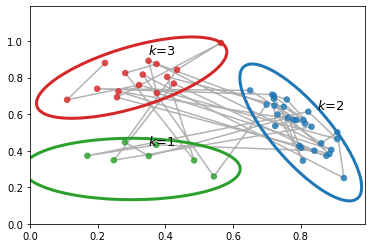

In [9]:

# Let's plot the observed data in 2d
xmin, xmax = 0, 1
ymin, ymax = 0, 1.2
colors = ["tab:green", "tab:blue", "tab:red"]

def plot_2dhmm(hmm, samples_obs, samples_state, colors, ax, xmin, xmax, ymin, ymax, step=1e-2):
    obs_dist = hmm.obs_dist
    color_sample = [colors[i] for i in samples_state]

    xs = jnp.arange(xmin, xmax, step)
    ys = jnp.arange(ymin, ymax, step)

    v_prob = vmap(lambda x, y: obs_dist.prob(jnp.array([x, y])), in_axes=(None, 0))
    z = vmap(v_prob, in_axes=(0, None))(xs, ys)

    grid = np.mgrid[xmin:xmax:step, ymin:ymax:step]

    for k, color in enumerate(colors):
        ax.contour(*grid, z[:, :, k], levels=[1], colors=color, linewidths=3)
        ax.text(*(obs_dist.mean()[k] + 0.13), f"$k$={k + 1}", fontsize=13, horizontalalignment="right")

    ax.plot(*samples_obs.T, c="black", alpha=0.3, zorder=1)
    ax.scatter(*samples_obs.T, c=color_sample, s=30, zorder=2, alpha=0.8)

    return ax, color_sample


fig, ax = plt.subplots()
_, color_sample = plot_2dhmm(hmm, samples_obs, samples_state, colors, ax, xmin, xmax, ymin, ymax)


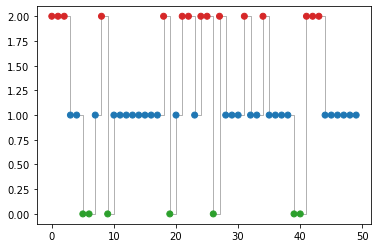

In [10]:
# Let's plot the hidden state sequence

fig, ax = plt.subplots()
ax.step(range(n_samples), samples_state, where="post", c="black", linewidth=1, alpha=0.3)
ax.scatter(range(n_samples), samples_state, c=color_sample, zorder=3)


(sec:lds-intro)=
# Linear Gaussian SSMs


Consider the state space model in 
{eq}`eq:SSM-ar`
where we assume the observations are conditionally iid given the
hidden states and inputs (i.e. there are no auto-regressive dependencies
between the observables).
We can rewrite this model as 
a stochastic nonlinear dynamical system (NLDS)
by defining the distribution of the next hidden state 
as a deterministic function of the past state
plus random process noise $\vepsilon_t$ 
\begin{align}
\hmmhid_t &= \ssmDynFn(\hmmhid_{t-1}, \inputs_t, \vepsilon_t)  
\end{align}
where $\vepsilon_t$ is drawn from the distribution such
that the induced distribution
on $\hmmhid_t$ matches $p(\hmmhid_t|\hmmhid_{t-1}, \inputs_t)$.
Similarly we can rewrite the observation distributions
as a deterministic function of the hidden state
plus observation noise $\veta_t$:
\begin{align}
\hmmobs_t &= \ssmObsFn(\hmmhid_{t}, \inputs_t, \veta_t)
\end{align}


If we assume additive Gaussian noise,
the model becomes
\begin{align}
\hmmhid_t &= \ssmDynFn(\hmmhid_{t-1}, \inputs_t) +  \vepsilon_t  \\
\hmmobs_t &= \ssmObsFn(\hmmhid_{t}, \inputs_t) + \veta_t
\end{align}
where $\vepsilon_t \sim \gauss(\vzero,\vQ_t)$
and $\veta_t \sim \gauss(\vzero,\vR_t)$.
We will call these Gaussian SSMs.

If we additionally assume
the transition function $\ssmDynFn$
and the observation function $\ssmObsFn$ are both linear,
then we can rewrite the model as follows:
\begin{align}
p(\hmmhid_t|\hmmhid_{t-1},\inputs_t) &= \gauss(\hmmhid_t|\ldsDyn_t \hmmhid_{t-1}
+ \ldsDynIn_t \inputs_t, \vQ_t)
\\
p(\hmmobs_t|\hmmhid_t,\inputs_t) &= \gauss(\hmmobs_t|\ldsObs_t \hmmhid_{t}
+ \ldsObsIn_t \inputs_t, \vR_t)
\end{align}
This is called a 
linear-Gaussian state space model
(LG-SSM),
or a
linear dynamical system (LDS).
We usually assume the parameters are independent of time, in which case
the model is said to be time-invariant or homogeneous.


(sec:tracking-lds)=
(sec:kalman-tracking)=
## Example: tracking a 2d point



% Sarkkar p43
Consider an object moving in $\real^2$.
Let the state be
the position and velocity of the object,
$$\vz_t =\begin{pmatrix} u_t & \dot{u}_t & v_t & \dot{v}_t \end{pmatrix}$$.
(We use $u$ and $v$ for the two coordinates,
to avoid confusion with the state and observation variables.)
If we use Euler discretization,
the dynamics become
\begin{align}
\underbrace{\begin{pmatrix} u_t\\ \dot{u}_t \\ v_t \\ \dot{v}_t \end{pmatrix}}_{\vz_t}
  = 
\underbrace{
\begin{pmatrix}
1 & 0 & \Delta & 0 \\
0 & 1 & 0 & \Delta\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
}_{\ldsDyn}
\
\underbrace{\begin{pmatrix} u_{t-1} \\ \dot{u}_{t-1} \\ v_{t-1} \\ \dot{v}_{t-1} \end{pmatrix}}_{\vz_{t-1}}
+ \vepsilon_t
\end{align}
where $\vepsilon_t \sim \gauss(\vzero,\vQ)$ is
the process noise.

Let us assume
that the process noise is 
a white noise process added to the velocity components
of the state, but not to the location.
(This is known as a random accelerations model.)
We can approximate the resulting process in discrete time by assuming
$\vQ = \diag(0, q, 0, q)$.
(See  {cite}`Sarkka13` p60 for a more accurate way
to convert the continuous time process to discrete time.)


Now suppose that at each discrete time point we
observe the location,
corrupted by  Gaussian noise.
Thus the observation model becomes
\begin{align}
\underbrace{\begin{pmatrix}  y_{1,t} \\  y_{2,t} \end{pmatrix}}_{\vy_t}
  &=
    \underbrace{
    \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
    \end{pmatrix}
    }_{\ldsObs}
    \
\underbrace{\begin{pmatrix} u_t\\ \dot{u}_t \\ v_t \\ \dot{v}_t \end{pmatrix}}_{\vz_t}    
 + \veta_t
\end{align}
where $\veta_t \sim \gauss(\vzero,\vR)$ is the \keywordDef{observation noise}.
We see that the observation matrix $\ldsObs$ simply ``extracts'' the
relevant parts  of the state vector.

Suppose we sample a trajectory and corresponding set
of noisy observations from this model,
$(\vz_{1:T}, \vy_{1:T}) \sim p(\vz,\vy|\vtheta)$.
(We use diagonal observation noise,
$\vR = \diag(\sigma_1^2, \sigma_2^2)$.)
The results are shown below. 


In [11]:
key = jax.random.PRNGKey(314)
timesteps = 15
delta = 1.0
A = jnp.array([
    [1, 0, delta, 0],
    [0, 1, 0, delta],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

C = jnp.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

state_size, _ = A.shape
observation_size, _ = C.shape

Q = jnp.eye(state_size) * 0.001
R = jnp.eye(observation_size) * 1.0
# Prior parameter distribution
mu0 = jnp.array([8, 10, 1, 0]).astype(float)
Sigma0 = jnp.eye(state_size) * 1.0

from jsl.lds.kalman_filter import LDS, smooth, filter

lds = LDS(A, C, Q, R, mu0, Sigma0)
print(lds)



LDS(A=DeviceArray([[1., 0., 1., 0.],
             [0., 1., 0., 1.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32), C=DeviceArray([[1, 0, 0, 0],
             [0, 1, 0, 0]], dtype=int32), Q=DeviceArray([[0.001, 0.   , 0.   , 0.   ],
             [0.   , 0.001, 0.   , 0.   ],
             [0.   , 0.   , 0.001, 0.   ],
             [0.   , 0.   , 0.   , 0.001]], dtype=float32), R=DeviceArray([[1., 0.],
             [0., 1.]], dtype=float32), mu=DeviceArray([ 8., 10.,  1.,  0.], dtype=float32), Sigma=DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32), state_offset=None, obs_offset=None, nstates=4, nobs=2)


In [12]:
from jsl.demos.plot_utils import plot_ellipse

def plot_tracking_values(observed, filtered, cov_hist, signal_label, ax):
    timesteps, _ = observed.shape
    ax.plot(observed[:, 0], observed[:, 1], marker="o", linewidth=0,
            markerfacecolor="none", markeredgewidth=2, markersize=8, label="observed", c="tab:green")
    ax.plot(*filtered[:, :2].T, label=signal_label, c="tab:red", marker="x", linewidth=2)
    for t in range(0, timesteps, 1):
        covn = cov_hist[t][:2, :2]
        plot_ellipse(covn, filtered[t, :2], ax, n_std=2.0, plot_center=False)
    ax.axis("equal")
    ax.legend()

(7.24486608505249, 23.857812213897706, 8.042076778411865, 11.636079120635987)

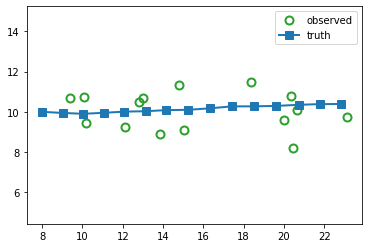

In [13]:

z_hist, x_hist = lds.sample(key, timesteps)

fig_truth, axs = plt.subplots()
axs.plot(x_hist[:, 0], x_hist[:, 1],
        marker="o", linewidth=0, markerfacecolor="none",
        markeredgewidth=2, markersize=8,
        label="observed", c="tab:green")

axs.plot(z_hist[:, 0], z_hist[:, 1],
        linewidth=2, label="truth",
        marker="s", markersize=8)
axs.legend()
axs.axis("equal")


The main task is to infer the hidden states given the noisy
observations, i.e., $p(\vz|\vy,\vtheta)$. We discuss the topic of inference in {ref}`sec:inference`.

(sec:nlds-intro)=
# Nonlinear Gaussian SSMs

In this section, we consider SSMs in which the dynamics and/or observation models are nonlinear,
but the process noise and observation noise are Gaussian.
That is, 
\begin{align}
\hmmhid_t &= \ssmDynFn(\hmmhid_{t-1}, \inputs_t) +  \vepsilon_t  \\
\hmmobs_t &= \ssmObsFn(\hmmhid_{t}, \inputs_t) + \veta_t
\end{align}
where $\vepsilon_t \sim \gauss(\vzero,\vQ_t)$
and $\veta_t \sim \gauss(\vzero,\vR_t)$.
This is a very widely used model class. We give some examples below.

(sec:pendulum)=
## Example: tracking a 1d pendulum

```{figure} /figures/pendulum.png
:scale: 100%
:name: fig:pendulum

Illustration of a pendulum swinging.
$g$ is the force of gravity,
$w(t)$ is a random external force,
and $\alpha$ is the angle wrt the vertical.
Based on {cite}`Sarkka13` fig 3.10.

```


% Sarka p45, p74
Consider a simple pendulum of unit mass and length swinging from
a fixed attachment, as in {ref}`fig:pendulum`.
Such an object is in principle entirely deterministic in its behavior.
However, in the real world, there are often unknown forces at work
(e.g., air turbulence, friction).
We will model these by a continuous time random Gaussian noise process $w(t)$.
This gives rise to the following differential equation:
\begin{align}
\frac{d^2 \alpha}{d t^2}
= -g \sin(\alpha) + w(t)
\end{align}
We can write this as a nonlinear SSM by defining the state to be
$z_1(t) = \alpha(t)$ and $z_2(t) = d\alpha(t)/dt$.
Thus
\begin{align}
\frac{d \vz}{dt}
= \begin{pmatrix} z_2 \\ -g \sin(z_1) \end{pmatrix}
+ \begin{pmatrix} 0 \\ 1 \end{pmatrix} w(t)
\end{align}
If we discretize this step size $\Delta$,
we get the following
formulation {cite}`Sarkka13` p74:
\begin{align}
\underbrace{
  \begin{pmatrix} z_{1,t} \\ z_{2,t} \end{pmatrix}
  }_{\hmmhid_t}
=
\underbrace{
  \begin{pmatrix} z_{1,t-1} + z_{2,t-1} \Delta  \\
    z_{2,t-1} -g \sin(z_{1,t-1}) \Delta  \end{pmatrix}
  }_{\vf(\hmmhid_{t-1})}
+\vq_{t-1}
\end{align}
where $\vq_{t-1} \sim \gauss(\vzero,\vQ)$ with
\begin{align}
\vQ = q^c \begin{pmatrix}
  \frac{\Delta^3}{3} &   \frac{\Delta^2}{2} \\
  \frac{\Delta^2}{2} & \Delta
  \end{pmatrix}
  \end{align}
where $q^c$ is the spectral density (continuous time variance)
of the continuous-time noise process.


If we observe the angular position, we
get the linear observation model
\begin{align}
y_t = \alpha_t + r_t =  h(\hmmhid_t) + r_t
\end{align}
where $h(\hmmhid_t) = z_{1,t}$
and $r_t$ is the observation noise.
If we only observe  the horizontal position,
we get the nonlinear observation model
\begin{align}
y_t = \sin(\alpha_t) + r_t =  h(\hmmhid_t) + r_t
\end{align}
where $h(\hmmhid_t) = \sin(z_{1,t})$.







(sec:inference)=
# Inferential goals

```{figure} /figures/inference-problems-tikz.png
:scale: 100%
:name: fig:dbn-inference

Illustration of the different kinds of inference in an SSM.
 The main kinds of inference for state-space models.
    The shaded region is the interval for which we have data.
    The arrow represents the time step at which we want to perform inference.
    $t$ is the current time,  $T$ is the sequence length,
$\ell$ is the lag and $h$ is the prediction horizon.
```



Given the sequence of observations, and a known model,
one of the main tasks with SSMs
to perform posterior inference,
about the hidden states; this is also called
state estimation.
At each time step $t$,
there are multiple forms of posterior we may be interested in computing,
including the following:
- the filtering distribution
$p(\hmmhid_t|\hmmobs_{1:t})$
- the smoothing distribution
$p(\hmmhid_t|\hmmobs_{1:T})$ (note that this conditions on future data $T>t$)
- the fixed-lag smoothing distribution
$p(\hmmhid_{t-\ell}|\hmmobs_{1:t})$ (note that this
infers $\ell$ steps in the past given data up to the present).

We may also want to compute the
predictive distribution $h$ steps into the future:
\begin{align}
p(\hmmobs_{t+h}|\hmmobs_{1:t})
&= \sum_{\hmmhid_{t+h}} p(\hmmobs_{t+h}|\hmmhid_{t+h}) p(\hmmhid_{t+h}|\hmmobs_{1:t})
\end{align}
where the hidden state predictive distribution is
\begin{align}
p(\hmmhid_{t+h}|\hmmobs_{1:t})
&= \sum_{\hmmhid_{t:t+h-1}}
 p(\hmmhid_t|\hmmobs_{1:t}) 
 p(\hmmhid_{t+1}|\hmmhid_{t})
 p(\hmmhid_{t+2}|\hmmhid_{t+1})
\cdots
 p(\hmmhid_{t+h}|\hmmhid_{t+h-1})
\end{align}
See {ref}`fig:dbn-inference` for a summary of these distributions.

In addition  to comuting posterior marginals,
we may want to compute the most probable hidden sequence,
i.e., the joint MAP estimate
```{math}
\arg \max_{\hmmhid_{1:T}} p(\hmmhid_{1:T}|\hmmobs_{1:T})
```
or sample sequences from the posterior
```{math}
\hmmhid_{1:T} \sim p(\hmmhid_{1:T}|\hmmobs_{1:T})
```

Algorithms for all these task are discussed in the following chapters,
since the details depend on the form of the SSM.






## Example: inference in the casino HMM

We now illustrate filtering, smoothing and MAP decoding applied
to the casino HMM from {ref}`sec:casino`. 


In [14]:
# Call inference engine

filtered_dist, _, smoothed_dist, loglik = hmm.forward_backward(x_hist)
map_path = hmm.viterbi(x_hist)

/opt/anaconda3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5154: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


In [15]:
# Find the span of timesteps that the    simulated systems turns to be in state 1
def find_dishonest_intervals(z_hist):
    spans = []
    x_init = 0
    for t, _ in enumerate(z_hist[:-1]):
        if z_hist[t + 1] == 0 and z_hist[t] == 1:
            x_end = t
            spans.append((x_init, x_end))
        elif z_hist[t + 1] == 1 and z_hist[t] == 0:
            x_init = t + 1
    return spans

In [16]:
# Plot posterior
def plot_inference(inference_values, z_hist, ax, state=1, map_estimate=False):
    n_samples = len(inference_values)
    xspan = np.arange(1, n_samples + 1)
    spans = find_dishonest_intervals(z_hist)
    if map_estimate:
        ax.step(xspan, inference_values, where="post")
    else:
        ax.plot(xspan, inference_values[:, state])

    for span in spans:
        ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
    ax.set_xlim(1, n_samples)
    # ax.set_ylim(0, 1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel("Observation number")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

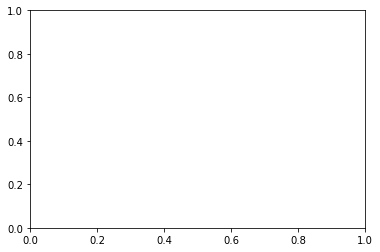

In [17]:
 # Filtering
fig, ax = plt.subplots()
plot_inference(filtered_dist, z_hist, ax)
ax.set_ylabel("p(loaded)")
ax.set_title("Filtered")
 

  

Text(0.5, 1.0, 'Smoothed')

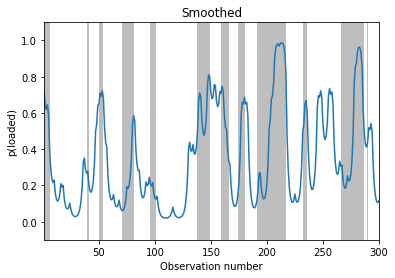

In [12]:
# Smoothing
fig, ax = plt.subplots()
plot_inference(smoothed_dist, z_hist, ax)
ax.set_ylabel("p(loaded)")
ax.set_title("Smoothed")


 

In [ ]:
# MAP estimation
fig, ax = plt.subplots()
plot_inference(map_path, z_hist, ax, map_estimate=True)
ax.set_ylabel("MAP state")
ax.set_title("Viterbi")


In [ ]:
# TODO: posterior samples


## Example: inference in the tracking SSM

We now illustrate filtering, smoothing and MAP decoding applied
to the 2d tracking HMM from {ref}`sec:tracking-lds`. 